In [1]:
import cv2
from extract import *
import matplotlib.pyplot as plt

-0.04013961605584642 176


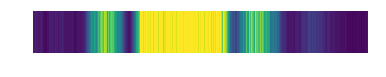

-0.042162698412698416 196


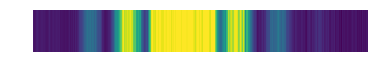

-0.046130952380952384 186


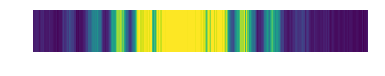

-0.04811507936507937 213


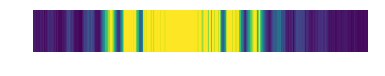

-0.047619047619047616 192


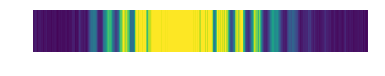

-0.04662698412698413 189


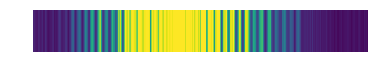

In [2]:
# Slits
for a in (40, 50, 100, 120, 280, 400):
    im = cv2.imread(f"raw-data/slits/{a}.png")
    a, b = main_axis(im)
    print(a, b)
    diffraction = pattern(im, (a, b))
    plt.axis('off')
    plt.imshow(np.array([diffraction] * 500))
    plt.show()

-0.043154761904761904 203


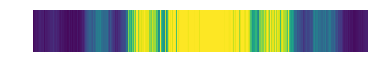

-0.047371031746031744 211


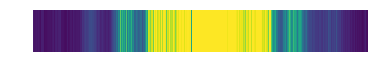

-0.05357142857142857 224


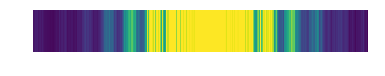

-0.060794044665012405 264


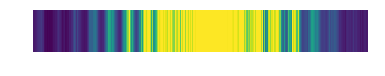

-0.052083333333333336 223


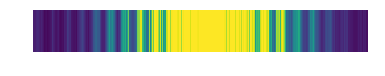

-0.060267857142857144 255


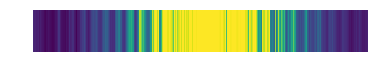

In [3]:
# Wires
for a in (38, 50, 76, 100, 120, 150):
    im = cv2.imread(f"raw-data/wires/{a}.png")
    a, b = main_axis(im)
    print(a, b)
    diffraction = pattern(im, (a, b))
    plt.axis('off')
    plt.imshow(np.array([diffraction] * 500))
    plt.show()